# 1. Random Data Generator
## a. Univariate gaussian data generator

###  Central Limit Theorem

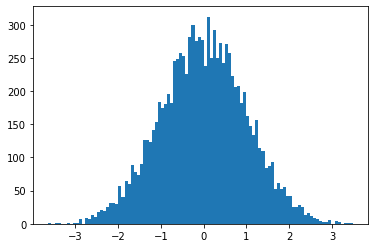

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def Gaussian_random_generator(mu=0, var=1, size=1):
    total = []
    for i in range(size):
        total.append(mu+ var**(0.5)*(np.sum(np.random.uniform(0, 1, 12))-6))
    return np.array(total)

test_points = Gaussian_random_generator(0, 1, 10000)
_ = plt.hist(test_points, bins=100)

### Box–Muller Method 

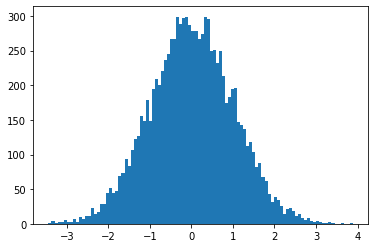

In [2]:
def Boxmuller(mu=0, var=10000, size=1):
    u = np.random.uniform(size=size)
    v = np.random.uniform(size=size)
    z = np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    return mu+z*var**(0.5)

test_points = Boxmuller(0, 1, 10000)
_ = plt.hist(test_points, bins=100)

## b. Polynomial basis linear model data generator

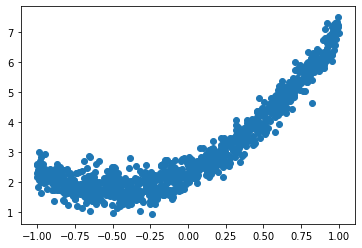

In [3]:
def Poly_generator(n, a, w):
    """
    Input
        n: Basis number
        a: Variance
        w: Weights
        
    Return
        x: Random point x coordinate
        y: Polynoimal answer with x (x^0*w0 + x^1*w2+....=y)
    """
    assert n == len(w), "Basis isn't equal to the lenght of W"
    x = np.random.uniform(-1, 1)
    x_parameter = np.array([x**i for i in range(n)])
    e = Boxmuller(mu=0, var=a, size=1)
    y = np.sum(x_parameter * w) + e

    return x, y


n = 3 # basis number
a = 0.1 # variance of N(0, a)
w = np.random.rand(n, 1)


x_list = []
y_list = []
for i in range(1000):
    x, y = Poly_generator(n, a, w)
    x_list.append(x)
    y_list.append(y)

_ = plt.scatter(x_list, y_list)

# 2. Sequential Estimator

## Naïve algorithm

In [4]:
mu = 3.0
var = 5.0

print(f'Data point source function: N({mu}, {var})')
print('')
def Naive_algorithm(m, s):
    """ 
    m: Initial mu
    s: Initial variance
    """
    n = 1
    new_mean = 0
    new_var = 0
    total = 0
    total_square = 0
    max_iteration = 10000
    epislon = 1e-5
    while (abs(new_mean-m)>epislon or abs(new_var-s)>epislon) and n<max_iteration:
        data_point = Boxmuller(mu=m, var=s, size=1)
        print(f'Add data point: {float(data_point)}')
        n += 1
        print('n:',n)
        new_mean += (data_point - new_mean) / n
        total += data_point
        total_square += data_point*data_point
        new_var = (total_square - (total*total)/n) / (n-1)
        print(f'Mean = {float(new_mean)} \t Variance = {float(new_var)}')
    
Naive_algorithm(mu, var)

Data point source function: N(3.0, 5.0)

Add data point: 3.7350715583957674
n: 2
Mean = 1.8675357791978837 	 Variance = 6.975379773168493
Add data point: 5.369795894504545
n: 3
Mean = 3.0349558176334375 	 Variance = 7.576298525006857
Add data point: -1.2787111994949658
n: 4
Mean = 1.9565390633513366 	 Variance = 9.70279646700327
Add data point: 1.545556091955153
n: 5
Mean = 1.8743424690721 	 Variance = 7.310878750807979
Add data point: -2.623964626701726
n: 6
Mean = 1.1246246197764624 	 Variance = 9.221164121961241
Add data point: -0.16080968988887268
n: 7
Mean = 0.9409911469671288 	 Variance = 7.920352201319814
Add data point: 3.492131939958618
n: 8
Mean = 1.259883746091065 	 Variance = 7.602413233625138
Add data point: 3.284670637803967
n: 9
Mean = 1.4848600673924985 	 Variance = 7.1076406857389305
Add data point: 5.7805810638029715
n: 10
Mean = 1.9144321670335458 	 Variance = 8.163224719668115
Add data point: 2.1168748751904634
n: 11
Mean = 1.9328360495932655 	 Variance = 7.35062797

Mean = 3.0268180398279934 	 Variance = 5.027927586678303
Add data point: -1.7401238385271052
n: 859
Mean = 3.0212686313549373 	 Variance = 5.048521238866285
Add data point: 5.907482277390121
n: 860
Mean = 3.0246246937340477 	 Variance = 5.052330344406051
Add data point: 4.03388592210099
n: 861
Mean = 3.0257968902826735 	 Variance = 5.047638594208552
Add data point: 1.8654081954227877
n: 862
Mean = 3.0244507317039497 	 Variance = 5.043338131097927
Add data point: -0.8089380929836367
n: 863
Mean = 3.0200087979557604 	 Variance = 5.054515049996942
Add data point: 1.6336042936584927
n: 864
Mean = 3.0184041631128236 	 Variance = 5.050882810977896
Add data point: -1.9784962824538148
n: 865
Mean = 3.0126273995919375 	 Variance = 5.073902794009974
Add data point: 2.5954991274388393
n: 866
Mean = 3.012145727222246 	 Variance = 5.068237929596397
Add data point: -0.4560046371278199
n: 867
Mean = 3.008145553791623 	 Variance = 5.076258663796402
Add data point: 4.727856087247297
n: 868
Mean = 3.010

Add data point: 2.016678939796247
n: 1819
Mean = 3.037137202219272 	 Variance = 5.1343718103160025
Add data point: 2.211471929218943
n: 1820
Mean = 3.0366835399813596 	 Variance = 5.131923749161285
Add data point: -1.784352154430957
n: 1821
Mean = 3.034036073921825 	 Variance = 5.14186753921033
Add data point: 3.149035768547252
n: 1822
Mean = 3.0340991912075688 	 Variance = 5.139051147190608
Add data point: 5.570409712777334
n: 1823
Mean = 3.035490475092138 	 Variance = 5.139759320180003
Add data point: 0.6433815350345045
n: 1824
Mean = 3.034179011857457 	 Variance = 5.140077086882138
Add data point: 2.490160099589659
n: 1825
Mean = 3.03388091930279 	 Variance = 5.137421230150797
Add data point: 3.110455125462188
n: 1826
Mean = 3.033922854793567 	 Variance = 5.134609415996124
Add data point: 3.383246355331991
n: 1827
Mean = 3.034114055395942 	 Variance = 5.13186426303948
Add data point: 2.7440740662148904
n: 1828
Mean = 3.0339553901939826 	 Variance = 5.129101380123789
Add data point: 

n: 2805
Mean = 3.013557872809215 	 Variance = 5.079014065420391
Add data point: 3.3388040510671964
n: 2806
Mean = 3.013673783777946 	 Variance = 5.077241064818414
Add data point: 3.3581086720975395
n: 2807
Mean = 3.0137964894738203 	 Variance = 5.075473905895874
Add data point: 3.7142139017988667
n: 2808
Mean = 3.014045925874221 	 Variance = 5.073840466614075
Add data point: 1.1000633721834652
n: 2809
Mean = 3.0133645508106075 	 Variance = 5.0733376833552555
Add data point: 2.2527226330625263
n: 2810
Mean = 3.0130938597366757 	 Variance = 5.07173748134198
Add data point: 2.529861322039717
n: 2811
Mean = 3.012921952039167 	 Variance = 5.070015663951499
Add data point: 2.768761140241641
n: 2812
Mean = 3.0128351238699644 	 Variance = 5.068233229813481
Add data point: 1.8309956625448203
n: 2813
Mean = 3.0124149889743634 	 Variance = 5.0669274029111095
Add data point: 4.086293501859471
n: 2814
Mean = 3.0127966089149765 	 Variance = 5.065535962400649
Add data point: 3.921123080340771
n: 2815

n: 3866
Mean = 2.9908122557222496 	 Variance = 5.126908097126784
Add data point: 0.02291710895605581
n: 3867
Mean = 2.990044762795752 	 Variance = 5.127859782503542
Add data point: 4.474349610869315
n: 3868
Mean = 2.9904285024152126 	 Variance = 5.127103312762898
Add data point: 1.7093214008883886
n: 3869
Mean = 2.990097381427483 	 Variance = 5.126201996292208
Add data point: 1.8546651476060962
n: 3870
Mean = 2.98980398808541 	 Variance = 5.1252101821885745
Add data point: -0.2924427482961298
n: 3871
Mean = 2.988956081411067 	 Variance = 5.126668877386867
Add data point: -3.248310528687762
n: 3872
Mean = 2.9873452171006076 	 Variance = 5.135391889140389
Add data point: 6.171682211387456
n: 3873
Mean = 2.9881674058417094 	 Variance = 5.1366837259374
Add data point: 5.270298975547679
n: 3874
Mean = 2.9887564950440084 	 Variance = 5.136701824671315
Add data point: 5.879741476470702
n: 3875
Mean = 2.9895025556843766 	 Variance = 5.137532732128221
Add data point: 8.104344371145235
n: 3876
M

Mean = 2.976507037360936 	 Variance = 5.10451977669116
Add data point: 6.286428318521822
n: 4829
Mean = 2.9771924631801863 	 Variance = 5.10573120800957
Add data point: 3.077265590712282
n: 4830
Mean = 2.9772131822542094 	 Variance = 5.1046759753215225
Add data point: 7.181742173745588
n: 4831
Mean = 2.978083504959962 	 Variance = 5.107278403637861
Add data point: 4.6978431518911385
n: 4832
Mean = 2.97843941548292 	 Variance = 5.106833295535815
Add data point: 2.6958421357877866
n: 4833
Mean = 2.9783809430476427 	 Variance = 5.105792941935401
Add data point: -0.010717563351428261
n: 4834
Mean = 2.9777625941634063 	 Variance = 5.106584803850008
Add data point: 4.936384095894416
n: 4835
Mean = 2.9781676865112305 	 Variance = 5.1063218373544785
Add data point: 0.39428284222121945
n: 4836
Mean = 2.9776333844342475 	 Variance = 5.106646296191324
Add data point: -0.8711924149198551
n: 4837
Mean = 2.9768376792865623 	 Variance = 5.108652861784188
Add data point: 2.1235859172208107
n: 4838
Mea

n: 5741
Mean = 2.981213237633073 	 Variance = 5.104165406023843
Add data point: 3.4721416722561824
n: 5742
Mean = 2.9812987354447453 	 Variance = 5.103318306798723
Add data point: 1.742293486956179
n: 5743
Mean = 2.9810829936288847 	 Variance = 5.102696841872519
Add data point: 6.584123358106634
n: 5744
Mean = 2.9817102638873245 	 Variance = 5.104068414734462
Add data point: 1.5413116302911878
n: 5745
Mean = 2.981459541757891 	 Variance = 5.103540963249281
Add data point: 5.097242020417534
n: 5746
Mean = 2.981827760079969 	 Variance = 5.103431688308268
Add data point: 4.099192173416534
n: 5747
Mean = 2.982022185765255 	 Variance = 5.102760761454722
Add data point: 1.221925038152954
n: 5748
Mean = 2.981715975405545 	 Variance = 5.102411821529126
Add data point: 5.705359116680123
n: 5749
Mean = 2.9821897348665427 	 Variance = 5.102814488506818
Add data point: 3.042950294677785
n: 5750
Mean = 2.982200301920423 	 Variance = 5.101927530203646
Add data point: -0.8039070819019187
n: 5751
Mean

Add data point: 3.2606101951625743
n: 6616
Mean = 2.9996634521407195 	 Variance = 5.082890103136768
Add data point: 0.21127547378064326
n: 6617
Mean = 2.999242054531779 	 Variance = 5.083296850778047
Add data point: -0.8986801999158343
n: 6618
Mean = 2.9986530665815754 	 Variance = 5.084824462266896
Add data point: 0.5330603676417729
n: 6619
Mean = 2.998280564285316 	 Variance = 5.084974568712326
Add data point: 0.589921448064433
n: 6620
Mean = 2.997916763814588 	 Variance = 5.085082491797655
Add data point: 3.311409052235057
n: 6621
Mean = 2.9979641119928724 	 Variance = 5.0843291957372045
Add data point: 2.2835732554660093
n: 6622
Mean = 2.997856230558785 	 Variance = 5.083638355687458
Add data point: 4.1725754306348595
n: 6623
Mean = 2.998033600210012 	 Variance = 5.083079025950791
Add data point: 2.010311609173144
n: 6624
Mean = 2.997884487590592 	 Variance = 5.082458818857904
Add data point: 4.341878651961807
n: 6625
Mean = 2.998087354634271 	 Variance = 5.081964191569692
Add data

Add data point: -0.28950199833009416
n: 7491
Mean = 3.0014228027789374 	 Variance = 5.055725120334204
Add data point: 4.701997785658568
n: 7492
Mean = 3.0016497882278 	 Variance = 5.055436219539421
Add data point: 1.980090502306502
n: 7493
Mean = 3.0015134530768695 	 Variance = 5.054900716053126
Add data point: 4.0261929756050545
n: 7494
Mean = 3.001650186399865 	 Variance = 5.054366207485127
Add data point: 2.499951671675271
n: 7495
Mean = 3.001583248639395 	 Variance = 5.053725335001759
Add data point: 5.881742042809366
n: 7496
Mean = 3.001967474732534 	 Variance = 5.054157687598487
Add data point: 5.306894733131973
n: 7497
Mean = 3.002274921345632 	 Variance = 5.054192082387286
Add data point: -1.9611841431225594
n: 7498
Mean = 3.001612950278085 	 Variance = 5.05680358674049
Add data point: 6.710785627962675
n: 7499
Mean = 3.0021075725847504 	 Variance = 5.057963805962495
Add data point: 7.332861998436773
n: 7500
Mean = 3.002685006508197 	 Variance = 5.059790045376627
Add data point

Mean = 3.0094707440011326 	 Variance = 5.089317528889701
Add data point: -1.3779432006813073
n: 8491
Mean = 3.0089540305463354 	 Variance = 5.090985116234494
Add data point: 4.84941152566799
n: 8492
Mean = 3.0091707589371883 	 Variance = 5.0907844213570606
Add data point: -1.7277172974382795
n: 8493
Mean = 3.0086130186738687 	 Variance = 5.092826894518163
Add data point: 8.583636539056023
n: 8494
Mean = 3.009269367098684 	 Variance = 5.095886402489479
Add data point: 3.617155479123386
n: 8495
Mean = 3.0093409252048673 	 Variance = 5.09532996213435
Add data point: 1.506659009674567
n: 8496
Mean = 3.009164055864527 	 Variance = 5.0949959370841755
Add data point: 2.5522201250556775
n: 8497
Mean = 3.009110278774871 	 Variance = 5.094420816703489
Add data point: 2.7583174848694068
n: 8498
Mean = 3.009080766796299 	 Variance = 5.093828662861825
Add data point: 1.4698072139819172
n: 8499
Mean = 3.008899654482754 	 Variance = 5.0935080292569905
Add data point: 3.17104842522193
n: 8500
Mean = 3

Mean = 3.008338396860775 	 Variance = 5.076860223416696
Add data point: 8.335320249516009
n: 9491
Mean = 3.008899663518941 	 Variance = 5.079315111254187
Add data point: 0.29915440688162365
n: 9492
Mean = 3.0086141867746683 	 Variance = 5.079553508754487
Add data point: 2.9719865845089757
n: 9493
Mean = 3.0086103283945707 	 Variance = 5.079018509590053
Add data point: 4.078283290145657
n: 9494
Mean = 3.0087229967073736 	 Variance = 5.0786040000796
Add data point: 1.0380246899354426
n: 9495
Mean = 3.00851544554289 	 Variance = 5.0784780930641675
Add data point: 3.641045370271587
n: 9496
Mean = 3.0085820556866065 	 Variance = 5.077985367827698
Add data point: 5.942276630852753
n: 9497
Mean = 3.0088909631916256 	 Variance = 5.078356858165972
Add data point: 0.845719085673081
n: 9498
Mean = 3.008663212941308 	 Variance = 5.078314788359782
Add data point: 5.442411989274456
n: 9499
Mean = 3.008919423992612 	 Variance = 5.078403669678439
Add data point: 2.9725918420363033
n: 9500
Mean = 3.008

### Welford's online algorithm 1

In [5]:
mu = 3.0
var = 5.0

print(f'Data point source function: N({mu}, {var})')
print('')
def Welford_algorithm(m, s):
    n = 1
    old_mean = 0
    old_var = 0
    new_mean = 0
    new_var = 0
    max_iteration = 10000
    epislon = 1e-5
    
    while (abs(old_mean-m)>epislon or abs(old_var-s)>epislon) and n<max_iteration:
        data_point = Boxmuller(mu=m, var=s, size=1)
        print(f'Add data point: {float(data_point)}')
        n += 1
        print('n:',n)
        new_mean = old_mean + (data_point - old_mean) / n
        new_var = old_var + (data_point-old_mean)**2 /n - old_var/(n-1)

        print(f'Mean = {float(new_mean)} \t Variance = {float(new_var)}')
        old_mean = new_mean
        old_var = new_var
    
Welford_algorithm(mu, var)

Data point source function: N(3.0, 5.0)

Add data point: 3.4442219486622356
n: 2
Mean = 1.7221109743311178 	 Variance = 5.931332415823344
Add data point: 4.634461784026881
n: 3
Mean = 2.6928945775630386 	 Variance = 5.792928620823526
Add data point: 1.6732335561492462
n: 4
Mean = 2.4379793222095905 	 Variance = 4.121879563530005
Add data point: 4.02638379779521
n: 5
Mean = 2.7556602173267146 	 Variance = 3.596015428259589
Add data point: 0.4676811570475472
n: 6
Mean = 2.3743303739468535 	 Variance = 3.749287039320328
Add data point: 2.166839075216266
n: 7
Mean = 2.3446887598424837 	 Variance = 3.13055624310726
Add data point: 1.8113388185089685
n: 8
Mean = 2.2780200171757943 	 Variance = 2.718891692653424
Add data point: 4.922236344950889
n: 9
Mean = 2.5718218313730272 	 Variance = 3.1559057853020134
Add data point: 5.2343273566820745
n: 10
Mean = 2.838072383903932 	 Variance = 3.5141431541652435
Add data point: 6.745244036352895
n: 11
Mean = 3.193269806853838 	 Variance = 4.5505461407

n: 421
Mean = 2.9692659501661436 	 Variance = 5.3438191785531055
Add data point: 6.606878534379929
n: 422
Mean = 2.9778858851998256 	 Variance = 5.362482005513019
Add data point: 5.936392787863418
n: 423
Mean = 2.9848799913526944 	 Variance = 5.370466813513644
Add data point: 8.061604376701052
n: 424
Mean = 2.996853397921912 	 Variance = 5.4185563595802435
Add data point: 4.469256401098522
n: 425
Mean = 3.0003178755764455 	 Variance = 5.4108778528276025
Add data point: 4.738227032183203
n: 426
Mean = 3.004397474535616 	 Variance = 5.405236347913258
Add data point: 1.5348013452600717
n: 427
Mean = 3.0009557974178747 	 Variance = 5.397605875049169
Add data point: 0.04140956170919008
n: 428
Mean = 2.9940409697643497 	 Variance = 5.405429864028315
Add data point: 4.607455996683403
n: 429
Mean = 2.9978018439529723 	 Variance = 5.398868205930487
Add data point: -1.7178943478345738
n: 430
Mean = 2.9868351086232336 	 Variance = 5.437999223588479
Add data point: 3.73294034741015
n: 431
Mean = 2

n: 1114
Mean = 2.9747703634161606 	 Variance = 4.948324275617086
Add data point: 3.463312387357175
n: 1115
Mean = 2.975208517697722 	 Variance = 4.944096389599815
Add data point: 6.342102565873903
n: 1116
Mean = 2.9782254478484176 	 Variance = 4.949819906602395
Add data point: 2.4380721655786353
n: 1117
Mean = 2.9777418728419094 	 Variance = 4.9456457887324285
Add data point: 4.257541215488694
n: 1118
Mean = 2.978886594973078 	 Variance = 4.942683188512263
Add data point: 4.190278615682831
n: 1119
Mean = 2.979969161568887 	 Variance = 4.939573596407425
Add data point: 0.45672788257096286
n: 1120
Mean = 2.9777162675697815 	 Variance = 4.940843916658092
Add data point: 4.9194599411869575
n: 1121
Mean = 2.979448420713062 	 Variance = 4.9397958462830625
Add data point: 6.050286380236432
n: 1122
Mean = 2.982185352940801 	 Variance = 4.94379392411713
Add data point: 7.806710377872203
n: 1123
Mean = 2.9864814571482197 	 Variance = 4.960114352931581
Add data point: 1.9223622479209554
n: 1124
M

Add data point: 4.305023277358132
n: 1503
Mean = 2.9581806933888064 	 Variance = 4.971425502529253
Add data point: -0.40841951953139644
n: 1504
Mean = 2.955942262396173 	 Variance = 4.975653736453969
Add data point: 11.433454626846906
n: 1505
Mean = 2.9615751609772034 	 Variance = 5.020098423412475
Add data point: 5.558292536201923
n: 1506
Mean = 2.9632994089023192 	 Variance = 5.021240194388445
Add data point: 2.0313882533904803
n: 1507
Mean = 2.962681020610672 	 Variance = 5.018482320500285
Add data point: 1.4210861499343557
n: 1508
Mean = 2.9616587428449717 	 Variance = 5.016728144313579
Add data point: -2.111822841399042
n: 1509
Mean = 2.958296594677812 	 Variance = 5.030459198321895
Add data point: 4.259460983164735
n: 1510
Mean = 2.959158292948333 	 Variance = 5.028246771785409
Add data point: 1.4349954418478206
n: 1511
Mean = 2.9581495815975054 	 Variance = 5.026454247404297
Add data point: 3.4920061645136196
n: 1512
Mean = 2.958502661348111 	 Variance = 5.023316166735713
Add da

Add data point: 1.6349276824295866
n: 1925
Mean = 2.9831046774908003 	 Variance = 5.191665131925593
Add data point: 2.275116479623476
n: 1926
Mean = 2.982737082372489 	 Variance = 5.189228416031249
Add data point: 4.565395357052251
n: 1927
Mean = 2.9835583892093753 	 Variance = 5.187833960657583
Add data point: 5.737752440480609
n: 1928
Mean = 2.9849869130948896 	 Variance = 5.189076211036106
Add data point: 5.579214214605231
n: 1929
Mean = 2.986331769135071 	 Variance = 5.189873643722106
Add data point: 2.0276902107254955
n: 1930
Mean = 2.9858350636643927 	 Variance = 5.187659358512818
Add data point: 5.728268536478701
n: 1931
Mean = 2.9872552777880665 	 Variance = 5.1888662948607704
Add data point: 6.152280814751879
n: 1932
Mean = 2.9888934897637207 	 Variance = 5.191364138139918
Add data point: 7.1516251266427044
n: 1933
Mean = 2.9910469981118215 	 Variance = 5.197641573991472
Add data point: 4.074257905382476
n: 1934
Mean = 2.9916070864816615 	 Variance = 5.195559368922567
Add data

Add data point: 2.7411844299516988
n: 2364
Mean = 2.957131502764986 	 Variance = 5.240956423123499
Add data point: 5.501448741077586
n: 2365
Mean = 2.9582073240074016 	 Variance = 5.241476667013312
Add data point: 6.474338826949834
n: 2366
Mean = 2.959693431996811 	 Variance = 5.244485748927837
Add data point: 3.8270245504047593
n: 2367
Mean = 2.9600598583248243 	 Variance = 5.24258695759524
Add data point: 3.5291040465861343
n: 2368
Mean = 2.96030016414757 	 Variance = 5.2405088365922685
Add data point: 4.452099376020348
n: 2369
Mean = 2.960929880995131 	 Variance = 5.239235194971008
Add data point: 3.8548313072370304
n: 2370
Mean = 2.9613070545927016 	 Variance = 5.237360770069721
Add data point: 3.02362393839711
n: 2371
Mean = 2.961333337546647 	 Variance = 5.235152551076499
Add data point: 3.4874191418906912
n: 2372
Mean = 2.9615551275147514 	 Variance = 5.233061238146049
Add data point: 1.3207134674418843
n: 2373
Mean = 2.9608636645311557 	 Variance = 5.231989638455499
Add data po

n: 2963
Mean = 2.9889103378740858 	 Variance = 5.1748508113550775
Add data point: 0.18127737599616278
n: 2964
Mean = 2.987963093285058 	 Variance = 5.175763836168488
Add data point: -1.8005351249316206
n: 2965
Mean = 2.9863480854542934 	 Variance = 5.181751089166995
Add data point: 4.361297090042338
n: 2966
Mean = 2.986811655583959 	 Variance = 5.1806408349648905
Add data point: 3.049878633561887
n: 2967
Mean = 2.986832911727531 	 Variance = 5.178895499586666
Add data point: -0.5813692272539157
n: 2968
Mean = 2.9856306872871734 	 Variance = 5.181439780417548
Add data point: 8.646963098253611
n: 2969
Mean = 2.9875375018412207 	 Variance = 5.1904891233339905
Add data point: 2.6294774079873586
n: 2970
Mean = 2.987416942887061 	 Variance = 5.1887840626199875
Add data point: 5.975215407847991
n: 2971
Mean = 2.988422597032117 	 Variance = 5.1900416891899175
Add data point: 5.34905789561397
n: 2972
Mean = 2.9892168888553274 	 Variance = 5.190169821902945
Add data point: -0.3910052421402761
n:

Add data point: 5.270645446969642
n: 3364
Mean = 2.9744593369668584 	 Variance = 5.231128139393378
Add data point: -0.6916025719488625
n: 3365
Mean = 2.973369868346081 	 Variance = 5.2335671666588945
Add data point: 5.8921115183742145
n: 3366
Mean = 2.974236993019292 	 Variance = 5.23454278470943
Add data point: 3.3569689678484513
n: 3367
Mean = 2.9743506645294877 	 Variance = 5.233031167797406
Add data point: 0.24145008495016151
n: 3368
Mean = 2.973539233241014 	 Variance = 5.233694517024917
Add data point: 6.571550091766223
n: 3369
Mean = 2.9746072091562783 	 Variance = 5.235983158661527
Add data point: 1.4274220322714861
n: 3370
Mean = 2.974148103762544 	 Variance = 5.235139314343288
Add data point: -0.8198651186449468
n: 3371
Mean = 2.9730226177873416 	 Variance = 5.237855969212364
Add data point: 2.8753746704928083
n: 3372
Mean = 2.9729936593213586 	 Variance = 5.2363049980835195
Add data point: 3.758874171032711
n: 3373
Mean = 2.9732266508753793 	 Variance = 5.234935223491907
Add

n: 3875
Mean = 2.9692109696567983 	 Variance = 5.176688686740832
Add data point: 6.565714944501493
n: 3876
Mean = 2.9701388602591834 	 Variance = 5.178689929319437
Add data point: 1.422107109275
n: 3877
Mean = 2.969739574277501 	 Variance = 5.177971945383771
Add data point: 1.0866201153938964
n: 3878
Mean = 2.969253983906463 	 Variance = 5.177550808557968
Add data point: 0.1172148398490438
n: 3879
Mean = 2.968518732773682 	 Variance = 5.178312665057624
Add data point: 2.790593799701899
n: 3880
Mean = 2.968472875832169 	 Variance = 5.176985863422579
Add data point: 5.4110211115537865
n: 3881
Mean = 2.9691022363670108 	 Variance = 5.177188832179522
Add data point: 2.5983828986050206
n: 3882
Mean = 2.969006739371194 	 Variance = 5.175890251554072
Add data point: 1.89996706415991
n: 3883
Mean = 2.9687314265524427 	 Variance = 5.1748512668181865
Add data point: 1.2191117773953495
n: 3884
Mean = 2.9682809580536897 	 Variance = 5.174306721235225
Add data point: 3.9755251420399964
n: 3885
Mean

n: 4238
Mean = 2.97699978338726 	 Variance = 5.201027709372957
Add data point: 1.5652296857761758
n: 4239
Mean = 2.976666740193674 	 Variance = 5.200270653431171
Add data point: 1.0247701099364548
n: 4240
Mean = 2.97620638721484 	 Variance = 5.199942446599454
Add data point: 4.471758886138347
n: 4241
Mean = 2.9765590286906534 	 Variance = 5.199243438919407
Add data point: 3.016148948725572
n: 4242
Mean = 2.9765683615336602 	 Variance = 5.198017860884359
Add data point: 4.090884851106736
n: 4243
Mean = 2.9768309862071396 	 Variance = 5.197085138284416
Add data point: -0.41422323498110103
n: 4244
Mean = 2.9760319630635985 	 Variance = 5.198569808108115
Add data point: 0.178142530391046
n: 4245
Mean = 2.975372860723746 	 Variance = 5.199188981381885
Add data point: 2.749897873486537
n: 4246
Mean = 2.975319757806356 	 Variance = 5.1979761752605915
Add data point: 2.3542856209832776
n: 4247
Mean = 2.975173528906704 	 Variance = 5.196842782988029
Add data point: 1.8593934430177352
n: 4248
Me

n: 4863
Mean = 2.9795258243161653 	 Variance = 5.176656106842168
Add data point: 3.7969074915054395
n: 4864
Mean = 2.979693871533926 	 Variance = 5.175728967077476
Add data point: 1.8693004507723818
n: 4865
Mean = 2.9794656303374696 	 Variance = 5.174918315585756
Add data point: 5.305047376891199
n: 4866
Mean = 2.9799435550696014 	 Variance = 5.174966064957037
Add data point: 4.971414046237641
n: 4867
Mean = 2.980352733309003 	 Variance = 5.174717436470774
Add data point: 3.3881676470550364
n: 4868
Mean = 2.9804365079420654 	 Variance = 5.173688375735796
Add data point: 3.0494535111418046
n: 4869
Mean = 2.980450682721938 	 Variance = 5.172626558560918
Add data point: -0.5173307340095827
n: 4870
Mean = 2.979732452451562 	 Variance = 5.1740764119329
Add data point: 0.5375453046760192
n: 4871
Mean = 2.979231079602501 	 Variance = 5.174238419572838
Add data point: 5.700114408548112
n: 4872
Mean = 2.979789553192186 	 Variance = 5.174695707219867
Add data point: -0.24318416881671423
n: 4873


n: 5238
Mean = 2.9849470672843297 	 Variance = 5.148365341811911
Add data point: 4.983175351041087
n: 5239
Mean = 2.9853284813487995 	 Variance = 5.1481446065656
Add data point: 3.3161462517337115
n: 5240
Mean = 2.985391614511087 	 Variance = 5.147182834262692
Add data point: 5.672646813457975
n: 5241
Mean = 2.985904351622124 	 Variance = 5.147578402929588
Add data point: 2.7477639772886158
n: 5242
Mean = 2.985858922325227 	 Variance = 5.14660704662667
Add data point: 2.4631895716583245
n: 5243
Mean = 2.9857592333397864 	 Variance = 5.145677348820322
Add data point: 0.5784739161898695
n: 5244
Mean = 2.985300178168705 	 Variance = 5.1458009879911355
Add data point: 2.822155871293233
n: 5245
Mean = 2.9852690734390817 	 Variance = 5.14482478852552
Add data point: 2.438336018076005
n: 5246
Mean = 2.985164816280225 	 Variance = 5.143900909394316
Add data point: -1.5245970666960869
n: 5247
Mean = 2.984305322877714 	 Variance = 5.146796482253859
Add data point: 2.8878330697318835
n: 5248
Mean

Add data point: -1.9014215699671082
n: 5760
Mean = 2.986681544120765 	 Variance = 5.147764781999184
Add data point: 0.665441895360178
n: 5761
Mean = 2.9862786210781054 	 Variance = 5.147806353777662
Add data point: 2.77006676911012
n: 5762
Mean = 2.98624109732733 	 Variance = 5.146920905608607
Add data point: 3.485888756142168
n: 5763
Mean = 2.9863277965566923 	 Variance = 5.146070972175473
Add data point: 4.4162689117077445
n: 5764
Mean = 2.986575877943776 	 Variance = 5.145532763929569
Add data point: 3.6123973375960636
n: 5765
Mean = 2.986684433270689 	 Variance = 5.144707998454061
Add data point: 3.776221671281564
n: 5766
Mean = 2.9868213630726332 	 Variance = 5.143923705815826
Add data point: 6.7340124260352985
n: 5767
Mean = 2.9874711274324324 	 Variance = 5.145466383992263
Add data point: 3.632600772743685
n: 5768
Mean = 2.9875829737648374 	 Variance = 5.144646313543135
Add data point: 5.7970571175517644
n: 5769
Mean = 2.9880699687628938 	 Variance = 5.1451225844258
Add data poi

Add data point: 4.265540776205833
n: 6363
Mean = 2.996670401184936 	 Variance = 5.137891059052646
Add data point: -1.4050578350552394
n: 6364
Mean = 2.9959787405569913 	 Variance = 5.140128097541495
Add data point: 2.4969135756055287
n: 6365
Mean = 2.9959003328327256 	 Variance = 5.139359539843626
Add data point: 0.22369371590871356
n: 6366
Mean = 2.99546486211062 	 Variance = 5.139759314041938
Add data point: 3.219104414666841
n: 6367
Mean = 2.9954999869029173 	 Variance = 5.138959792753866
Add data point: 3.739734351735901
n: 6368
Mean = 2.995616857877294 	 Variance = 5.138239647947466
Add data point: 3.5845804537461943
n: 6369
Mean = 2.9957093313575687 	 Variance = 5.137487227094105
Add data point: 1.1785796505137247
n: 6370
Mean = 2.995424067671408 	 Variance = 5.137198948665592
Add data point: 3.1149863661257897
n: 6371
Mean = 2.9954428343169037 	 Variance = 5.13639472479601
Add data point: 1.570352256096004
n: 6372
Mean = 2.995219185450265 	 Variance = 5.1359072298519575
Add data

Add data point: 4.379107941916816
n: 6738
Mean = 2.986573585062062 	 Variance = 5.132188574715768
Add data point: 4.534540942046871
n: 6739
Mean = 2.986803287889927 	 Variance = 5.131782468867014
Add data point: 4.745496234416169
n: 6740
Mean = 2.9870642215615186 	 Variance = 5.131479866034113
Add data point: 4.172695882522551
n: 6741
Mean = 2.9872401052080044 	 Variance = 5.1309270520929
Add data point: 1.5043792526515705
n: 6742
Mean = 2.9870201614446468 	 Variance = 5.130492045878682
Add data point: 1.4747605764527325
n: 6743
Mean = 2.986795890410242 	 Variance = 5.130070227108361
Add data point: 2.3257586243836097
n: 6744
Mean = 2.9866978718358013 	 Variance = 5.129374221657677
Add data point: 4.335713517070408
n: 6745
Mean = 2.986897874155332 	 Variance = 5.128883444549607
Add data point: 3.2469079823414493
n: 6746
Mean = 2.9869364170115706 	 Variance = 5.128133068239789
Add data point: -0.2732932177578231
n: 6747
Mean = 2.9864532052678667 	 Variance = 5.128948275595547
Add data p

Mean = 2.9947610586972773 	 Variance = 5.097021257320568
Add data point: 4.133073855477349
n: 7363
Mean = 2.9949156577461404 	 Variance = 5.096504897470517
Add data point: 5.914732930265441
n: 7364
Mean = 2.9953121565609857 	 Variance = 5.096970423791765
Add data point: 4.66041713151704
n: 7365
Mean = 2.9955382400606405 	 Variance = 5.09665472956323
Add data point: 0.3286301297830163
n: 7366
Mean = 2.99517618356997 	 Variance = 5.096928290807997
Add data point: 5.665914658269592
n: 7367
Mean = 2.995538710850369 	 Variance = 5.097204553025467
Add data point: 1.7407900349300458
n: 7368
Mean = 2.9953684137988055 	 Variance = 5.0967263361131145
Add data point: 0.7548050845085754
n: 7369
Mean = 2.9950643612368175 	 Variance = 5.096715847031604
Add data point: 2.56396289837091
n: 7370
Mean = 2.9950058671441626 	 Variance = 5.096049421113211
Add data point: 5.026289236364914
n: 7371
Mean = 2.995281444863498 	 Variance = 5.095917739013959
Add data point: 8.748460470411079
n: 7372
Mean = 2.9960

Mean = 2.9946514105114113 	 Variance = 5.096440528060944
Add data point: 1.6956569873893077
n: 7738
Mean = 2.9944835383967665 	 Variance = 5.095999882839062
Add data point: 2.403118024839955
n: 7739
Mean = 2.9944071247110764 	 Variance = 5.09538650316723
Add data point: 2.167190197962625
n: 7740
Mean = 2.9943002491391453 	 Variance = 5.094816508714645
Add data point: 4.677331321855782
n: 7741
Mean = 2.99451766692402 	 Variance = 5.094524184575386
Add data point: 2.680736556407047
n: 7742
Mean = 2.994477137201659 	 Variance = 5.0938787798064
Add data point: 5.49689852068205
n: 7743
Mean = 2.9948003221924226 	 Variance = 5.094029570978663
Add data point: 4.370925665843256
n: 7744
Mean = 2.9949780243287414 	 Variance = 5.093616223032137
Add data point: 1.3788949605054843
n: 7745
Mean = 2.994769362861495 	 Variance = 5.093295687266626
Add data point: 6.46779185189997
n: 7746
Mean = 2.995217726208905 	 Variance = 5.094195239538558
Add data point: -0.08770893545280067
n: 7747
Mean = 2.994819

n: 8362
Mean = 2.9912299291322024 	 Variance = 5.0803280024092565
Add data point: -0.7233478175788721
n: 8363
Mean = 2.9907857610410016 	 Variance = 5.081370349926243
Add data point: 5.907954769109025
n: 8364
Mean = 2.9911345378234104 	 Variance = 5.081780189365546
Add data point: 0.6242089131402899
n: 8365
Mean = 2.990851581980651 	 Variance = 5.081842347063774
Add data point: 5.495548612961825
n: 8366
Mean = 2.9911509720154323 	 Variance = 5.081984715860978
Add data point: 5.817730503744153
n: 8367
Mean = 2.991488796747323 	 Variance = 5.082332147398732
Add data point: 5.812617322429903
n: 8368
Mean = 2.991825929697333 	 Variance = 5.082675816923728
Add data point: 2.9875411053183027
n: 8369
Mean = 2.9918254177097143 	 Variance = 5.082068424779918
Add data point: 3.3419112771058237
n: 8370
Mean = 2.9918672439772647 	 Variance = 5.081475818380276
Add data point: 0.7264469411745562
n: 8371
Mean = 2.9915966167758787 	 Variance = 5.081481796904244
Add data point: 1.5732306140576926
n: 83

Add data point: 5.229046790456068
n: 8644
Mean = 2.9972641541169227 	 Variance = 5.096214573697016
Add data point: 4.085826739353212
n: 8645
Mean = 2.997390072287569 	 Variance = 5.0957620768041965
Add data point: 3.8779647723487702
n: 8646
Mean = 2.9974919199281036 	 Variance = 5.095262315096981
Add data point: 2.389858144532891
n: 8647
Mean = 2.9974216488774044 	 Variance = 5.09471569397633
Add data point: 8.34710714763743
n: 8648
Mean = 2.998040252658482 	 Variance = 5.097435840837205
Add data point: 1.2799162877028534
n: 8649
Mean = 2.997841602645191 	 Variance = 5.0971877109589405
Add data point: 2.0354630903286517
n: 8650
Mean = 2.997730345013709 	 Variance = 5.096705444525602
Add data point: 1.948107256456939
n: 8651
Mean = 2.9976090153306023 	 Variance = 5.096243580460061
Add data point: -2.946408408044733
n: 8652
Mean = 2.9969220045327085 	 Variance = 5.099738091608457
Add data point: 4.835760700487122
n: 8653
Mean = 2.9971345133384353 	 Variance = 5.099539432210482
Add data p

n: 9362
Mean = 3.0080632958946207 	 Variance = 5.10849655793622
Add data point: 2.110890198835972
n: 9363
Mean = 3.0079674747799077 	 Variance = 5.10803686311033
Add data point: 0.30646186002859777
n: 9364
Mean = 3.007678975675385 	 Variance = 5.108270689484512
Add data point: 0.6679695296404939
n: 9365
Mean = 3.007429140176609 	 Variance = 5.108309709674592
Add data point: 5.012062240902335
n: 9366
Mean = 3.0076431731790354 	 Variance = 5.108193299114124
Add data point: 4.185444325135251
n: 9367
Mean = 3.0077689125995497 	 Variance = 5.1077959976149145
Add data point: 4.120107803240437
n: 9368
Mean = 3.007887650739029 	 Variance = 5.107382777772165
Add data point: 3.318589621510747
n: 9369
Mean = 3.0079208135067494 	 Variance = 5.106847886934541
Add data point: 2.461103072520989
n: 9370
Mean = 3.007862455156591 	 Variance = 5.106334719023723
Add data point: 3.7818569607121058
n: 9371
Mean = 3.007945049810903 	 Variance = 5.105853680480265
Add data point: 4.521509251955882
n: 9372
Mean

Add data point: 2.776449923070468
n: 9827
Mean = 3.0065428091036166 	 Variance = 5.093942761830721
Add data point: 3.442889953553808
n: 9828
Mean = 3.0065872074699627 	 Variance = 5.09344377299339
Add data point: 1.5611033962016307
n: 9829
Mean = 3.0064401443087796 	 Variance = 5.093138091989953
Add data point: 3.9607720396467
n: 9830
Mean = 3.006537227919699 	 Variance = 5.092712567381599
Add data point: 0.08643644291901076
n: 9831
Mean = 3.006240198036167 	 Variance = 5.0930618459848525
Add data point: 1.3803803892620286
n: 9832
Mean = 3.006074833938448 	 Variance = 5.092812643402508
Add data point: -0.825474022599118
n: 9833
Mean = 3.0056851716933 	 Variance = 5.093787669947128
Add data point: 1.899009631595369
n: 9834
Mean = 3.0055726360475714 	 Variance = 5.093394180527892
Add data point: 2.881564602460487
n: 9835
Mean = 3.005560027198198 	 Variance = 5.092877806951349
Add data point: -1.6145659388062343
n: 9836
Mean = 3.0050903112602145 	 Variance = 5.094530121744231
Add data poi

### Welford's online algorithm 2

In [6]:
mu = 3.0
var = 5.0

print(f'Data point source function: N({mu}, {var})')
print('')
def Welford_algorithm(m, s):
    inital = Boxmuller(mu=m, var=s, size=1)
    n = 1
    old_mean = inital
    M_2n = 0
    new_var = 0
    max_iteration = 10000
    epislon = 1e-5

    while (abs(old_mean-m)>epislon or abs(new_var-s)>epislon) and n<max_iteration:
        data_point = Boxmuller(mu=m, var=s, size=1)
        print(f'Add data point: {float(data_point)}')
        n += 1
        print('n:',n)
        mean = old_mean + (data_point - old_mean)/n
        M_2n = M_2n + (data_point - old_mean) * (data_point - mean)
        new_var = M_2n / (n-1)

        print(f'Mean = {float(mean)} \t Variance = {float(new_var)}')
        old_mean = mean
    
Welford_algorithm(mu, var)

Data point source function: N(3.0, 5.0)

Add data point: 0.3274151075169014
n: 2
Mean = 2.182631829830546 	 Variance = 6.883658173504364
Add data point: 3.4965057499153223
n: 3
Mean = 2.620589803192138 	 Variance = 4.017250646045161
Add data point: 4.750187604239672
n: 4
Mean = 3.1529892534540216 	 Variance = 3.811963795920064
Add data point: 6.903497331460435
n: 5
Mean = 3.9030908690553043 	 Variance = 5.67223501557832
Add data point: 2.435377446246709
n: 6
Mean = 3.658471965253872 	 Variance = 4.896818461044743
Add data point: 0.2947058957103108
n: 7
Mean = 3.1779339553190775 	 Variance = 5.697099503815267
Add data point: 4.003339232773944
n: 8
Mean = 3.281109615000936 	 Variance = 4.968389880133665
Add data point: 0.7184117345905978
n: 9
Mean = 2.9963654060664537 	 Variance = 5.077054525812472
Add data point: 1.585424957737149
n: 10
Mean = 2.855271361233523 	 Variance = 4.712012651150923
Add data point: 2.0122319894670553
n: 11
Mean = 2.7786314183456624 	 Variance = 4.30542187534023

Mean = 3.115172544556128 	 Variance = 5.051763305924161
Add data point: 5.630195805449958
n: 274
Mean = 3.1243514615666896 	 Variance = 5.056343868221309
Add data point: 3.0801535020940523
n: 275
Mean = 3.1241907417140617 	 Variance = 5.037897161972808
Add data point: -1.4950247456760009
n: 276
Mean = 3.107454453716272 	 Variance = 5.096886056650083
Add data point: 6.7658699234818975
n: 277
Mean = 3.120661729780408 	 Variance = 5.126736781250459
Add data point: 2.993592494793609
n: 278
Mean = 3.1202046462013184 	 Variance = 5.108286787488614
Add data point: 0.27243803934339006
n: 279
Mean = 3.109997597431218 	 Variance = 5.118978947801581
Add data point: 5.4353297846009365
n: 280
Mean = 3.1183023552425384 	 Variance = 5.119942673651905
Add data point: 7.385570291439856
n: 281
Mean = 3.1334883621329204 	 Variance = 5.166459924385347
Add data point: 5.924847766091064
n: 282
Mean = 3.143386799735609 	 Variance = 5.175704042893508
Add data point: 1.6279101236663533
n: 283
Mean = 3.13803175

Add data point: 1.6536938699103418
n: 611
Mean = 2.976616265231279 	 Variance = 5.125616418915365
Add data point: 2.9002868418201593
n: 612
Mean = 2.9764915439511954 	 Variance = 5.117237041242794
Add data point: 4.056055021493005
n: 613
Mean = 2.9782526589227154 	 Variance = 5.110776778212396
Add data point: 2.8243514506490874
n: 614
Mean = 2.978002005489045 	 Variance = 5.102478034701514
Add data point: 3.9602763967646366
n: 615
Mean = 2.9795991996212003 	 Variance = 5.095736692783208
Add data point: 4.472891517371277
n: 616
Mean = 2.982023375461704 	 Variance = 5.091070945222735
Add data point: 5.471366234228315
n: 617
Mean = 2.9860579668049234 	 Variance = 5.092849700810595
Add data point: 0.6857487842422056
n: 618
Mean = 2.9823357836616182 	 Variance = 5.093157659420818
Add data point: 4.066752546037739
n: 619
Mean = 2.984087668576604 	 Variance = 5.0868160773524265
Add data point: -0.910187256724087
n: 620
Mean = 2.9778065799874094 	 Variance = 5.103058566578076
Add data point: 2

Mean = 2.951165759454176 	 Variance = 5.12890087075576
Add data point: 0.8955589592103848
n: 986
Mean = 2.9490809655391215 	 Variance = 5.1279793813444945
Add data point: 4.96742811934984
n: 987
Mean = 2.9511258967993146 	 Variance = 5.126905972085633
Add data point: 6.621593873259611
n: 988
Mean = 2.9548409453584847 	 Variance = 5.13534750524406
Add data point: 2.560094592093581
n: 989
Mean = 2.954441808499774 	 Variance = 5.130307342916482
Add data point: 0.1979627761383913
n: 990
Mean = 2.9516574862448635 	 Variance = 5.132794900436215
Add data point: 3.2123435139415326
n: 991
Mean = 2.9519205397541435 	 Variance = 5.12767883349705
Add data point: 2.8560618616254767
n: 992
Mean = 2.951823908022159 	 Variance = 5.122513849430133
Add data point: 5.460774022767712
n: 993
Mean = 2.9543505445928995 	 Variance = 5.123689230099223
Add data point: 2.0464382993397847
n: 994
Mean = 2.9534371519920413 	 Variance = 5.11935870254097
Add data point: 2.098226650958259
n: 995
Mean = 2.9525776439508

Mean = 2.9669874587501086 	 Variance = 4.931186117419668
Add data point: 5.07930500193859
n: 1361
Mean = 2.968539492213142 	 Variance = 4.930838632786088
Add data point: 6.023572266920519
n: 1362
Mean = 2.970782541240093 	 Variance = 4.934068268372758
Add data point: 1.463147791852714
n: 1363
Mean = 2.969676426236874 	 Variance = 4.932113221861577
Add data point: -0.35382460199863397
n: 1364
Mean = 2.967239841905323 	 Variance = 4.936592640696713
Add data point: 1.2187609849306635
n: 1365
Mean = 2.9659589050137662 	 Variance = 4.935213128952958
Add data point: 1.716992843881463
n: 1366
Mean = 2.965044581396539 	 Variance = 4.932739547365954
Add data point: 4.575523315764714
n: 1367
Mean = 2.966222693126143 	 Variance = 4.931025788129204
Add data point: 0.655911406227264
n: 1368
Mean = 2.964533869086012 	 Variance = 4.931320309522767
Add data point: -0.8871730256037336
n: 1369
Mean = 2.961720350536202 	 Variance = 4.938552392011276
Add data point: 1.4764348305124892
n: 1370
Mean = 2.960

Add data point: 2.6501553621908034
n: 1500
Mean = 2.9572657860436515 	 Variance = 4.862315299444592
Add data point: 3.9073295525277336
n: 1501
Mean = 2.957898739918724 	 Variance = 4.859675102454192
Add data point: 2.9213469030633132
n: 1502
Mean = 2.957874404474746 	 Variance = 4.85643836697439
Add data point: 5.2442019591491436
n: 1503
Mean = 2.9593955804924934 	 Variance = 4.856682959127283
Add data point: 4.068703507333051
n: 1504
Mean = 2.960133152252361 	 Variance = 4.8542698273396745
Add data point: 1.270714346960136
n: 1505
Mean = 2.9590106148402064 	 Variance = 4.852938690129915
Add data point: 3.906583875420643
n: 1506
Mean = 2.9596398135524113 	 Variance = 4.850310358025038
Add data point: 4.667775728861184
n: 1507
Mean = 2.9607732813130676 	 Variance = 4.849025817407609
Add data point: 2.056567296426665
n: 1508
Mean = 2.9601736752222942 	 Variance = 4.846350316729628
Add data point: 5.630088138046217
n: 1509
Mean = 2.961943002235431 	 Variance = 4.8478605083544855
Add data 

n: 1938
Mean = 3.0131187555818975 	 Variance = 4.880033601438323
Add data point: 4.490337068057965
n: 1939
Mean = 3.0138806010241233 	 Variance = 4.878640936283131
Add data point: 1.0638309204193772
n: 1940
Mean = 3.012875420776389 	 Variance = 4.878085027396654
Add data point: 1.1468219101298498
n: 1941
Mean = 3.0119140330841447 	 Variance = 4.877364551456614
Add data point: 3.6977062343428537
n: 1942
Mean = 3.0122671701599733 	 Variance = 4.875093919933274
Add data point: 4.0551240112986795
n: 1943
Mean = 3.0128038952454794 	 Variance = 4.873143300336852
Add data point: 0.3878967200487069
n: 1944
Mean = 3.0114536343528884 	 Variance = 4.874179558735492
Add data point: 3.640723143844152
n: 1945
Mean = 3.011777166234375 	 Variance = 4.871875853472165
Add data point: 4.829572931258474
n: 1946
Mean = 3.0127112853325375 	 Variance = 4.871069070722616
Add data point: 4.477653811609152
n: 1947
Mean = 3.013463695464164 	 Variance = 4.869668189580258
Add data point: 3.6520005111232052
n: 1948

n: 2360
Mean = 2.9912937481539665 	 Variance = 4.885484621607923
Add data point: 0.6090863092476102
n: 2361
Mean = 2.9902847657571403 	 Variance = 4.885818106376992
Add data point: 4.269552483818181
n: 2362
Mean = 2.990826369363432 	 Variance = 4.884441577335097
Add data point: 6.411791293451275
n: 2363
Mean = 2.9922740904485305 	 Variance = 4.887326254232409
Add data point: 3.6338304437605493
n: 2364
Mean = 2.992545476384788 	 Variance = 4.885432091807894
Add data point: 1.4997192220812754
n: 2365
Mean = 2.9919142602096067 	 Variance = 4.884307792246833
Add data point: 0.552509616261232
n: 2366
Mean = 2.9908832354234915 	 Variance = 4.884757632474325
Add data point: 2.9002416420132127
n: 2367
Mean = 2.990844941552173 	 Variance = 4.88269653982638
Add data point: 4.198212512344498
n: 2368
Mean = 2.991354809614163 	 Variance = 4.881249317313922
Add data point: 5.699571996779859
n: 2369
Mean = 2.9924979996467362 	 Variance = 4.8822839858141975
Add data point: 4.869252469607313
n: 2370
Me

Mean = 2.994732838516614 	 Variance = 4.874241770003313
Add data point: 3.0224907321632006
n: 2452
Mean = 2.994744159027889 	 Variance = 4.872253409504098
Add data point: 2.1689711448442033
n: 2453
Mean = 2.994407521027814 	 Variance = 4.870544343302986
Add data point: 7.288811582498547
n: 2454
Mean = 2.996157481933059 	 Variance = 4.876073836519723
Add data point: 5.120469926342951
n: 2455
Mean = 2.9970227823177473 	 Variance = 4.875925014741637
Add data point: 4.063924997242769
n: 2456
Mean = 2.997457188757049 	 Variance = 4.874402363764968
Add data point: 2.7090612990408935
n: 2457
Mean = 2.9973398115125574 	 Variance = 4.872451523363635
Add data point: 1.9452781062560383
n: 2458
Mean = 2.996911796172746 	 Variance = 4.870918732158814
Add data point: 7.2721430405338525
n: 2459
Mean = 2.9986504018028235 	 Variance = 4.87637001389986
Add data point: 0.5746380572803651
n: 2460
Mean = 2.997665030931066 	 Variance = 4.876775494697477
Add data point: 3.1234448147480074
n: 2461
Mean = 2.99

Add data point: 5.095313282960055
n: 2985
Mean = 3.0227800706775207 	 Variance = 4.848090479276433
Add data point: 1.9478849711003876
n: 2986
Mean = 3.0224200924124247 	 Variance = 4.846853267235208
Add data point: 4.858992217989622
n: 2987
Mean = 3.0230349474929663 	 Variance = 4.846359300282599
Add data point: 3.465577488334672
n: 2988
Mean = 3.0231830540996736 	 Variance = 4.844802359893144
Add data point: 5.844568616765357
n: 2989
Mean = 3.0241269770045465 	 Variance = 4.845844110550062
Add data point: 1.0085433753164363
n: 2990
Mean = 3.023452868776557 	 Variance = 4.845581606175138
Add data point: 3.3025395870488863
n: 2991
Mean = 3.0235461776091457 	 Variance = 4.843987051576103
Add data point: 1.2819265580515933
n: 2992
Mean = 3.0229640854903095 	 Variance = 4.8433813137173924
Add data point: 2.6031174713345777
n: 2993
Mean = 3.0228238093078317 	 Variance = 4.841821431020607
Add data point: 4.453539574548134
n: 2994
Mean = 3.023301670284866 	 Variance = 4.840887399108363
Add da

Add data point: 6.14946381953996
n: 3485
Mean = 3.02632274936256 	 Variance = 4.760681247463473
Add data point: 3.360614245455016
n: 3486
Mean = 3.0264186448003376 	 Variance = 4.759347255354396
Add data point: 1.647502609635823
n: 3487
Mean = 3.0260231999953007 	 Variance = 4.758527265937155
Add data point: 1.9499483920217755
n: 3488
Mean = 3.0257146923095286 	 Variance = 4.7574945953748
Add data point: 2.3951996703276466
n: 3489
Mean = 3.025533977198614 	 Variance = 4.756244578360459
Add data point: -1.7147293016885268
n: 3490
Mean = 3.0241757355714256 	 Variance = 4.761319789868598
Add data point: 3.3575501796925384
n: 3491
Mean = 3.024271230972205 	 Variance = 4.759987350583326
Add data point: 3.0283068904813506
n: 3492
Mean = 3.0242723866593497 	 Variance = 4.758623852712028
Add data point: 5.665727286671151
n: 3493
Mean = 3.0250286004870084 	 Variance = 4.759258635825248
Add data point: 0.4969323977588034
n: 3494
Mean = 3.024305046908666 	 Variance = 4.759725335671046
Add data po

Mean = 3.013774013790184 	 Variance = 4.840037105617398
Add data point: 6.013180299032715
n: 4110
Mean = 3.0145037963413377 	 Variance = 4.841048108791885
Add data point: 7.172383676824672
n: 4111
Mean = 3.0155151998637124 	 Variance = 4.844075532562536
Add data point: 1.2494276307341095
n: 4112
Mean = 3.0150857038595467 	 Variance = 4.843655739626929
Add data point: 8.178450344027436
n: 4113
Mean = 3.016341080625938 	 Variance = 4.848959775789307
Add data point: 1.4982096403039398
n: 4114
Mean = 3.0159720647191994 	 Variance = 4.848341055409938
Add data point: 1.015430726736672
n: 4115
Mean = 3.015485906435364 	 Variance = 4.848135137084665
Add data point: 3.984212886774482
n: 4116
Mean = 3.0157212628445818 	 Variance = 4.8471849715510675
Add data point: 5.820022110993239
n: 4117
Mean = 3.0164024143743724 	 Variance = 4.847917480812867
Add data point: 3.6911890086828363
n: 4118
Mean = 3.01656627707333 	 Variance = 4.8468505167357945
Add data point: 2.399985153730735
n: 4119
Mean = 3.0

Add data point: 0.7478608279681005
n: 4473
Mean = 3.0151694558965416 	 Variance = 4.91122963120753
Add data point: 5.888123857392847
n: 4474
Mean = 3.015811600376089 	 Variance = 4.911976510820779
Add data point: 1.9809200298309895
n: 4475
Mean = 3.015580339689934 	 Variance = 4.9111179468337935
Add data point: 4.124274810708131
n: 4476
Mean = 3.015828037292932 	 Variance = 4.91029511127229
Add data point: 3.1816677992566116
n: 4477
Mean = 3.01586507990226 	 Variance = 4.909204226905051
Add data point: 3.899623168441421
n: 4478
Mean = 3.0160624354378873 	 Variance = 4.908282102651667
Add data point: 6.154226855733718
n: 4479
Mean = 3.016763074960168 	 Variance = 4.90938473666331
Add data point: 4.594059310322697
n: 4480
Mean = 3.017115150012704 	 Variance = 4.908843973848122
Add data point: 4.4068918237140835
n: 4481
Mean = 3.0174252987905885 	 Variance = 4.908179287283698
Add data point: 2.4898001143231836
n: 4482
Mean = 3.017307577865897 	 Variance = 4.907146068568116
Add data point:

n: 5109
Mean = 3.0072237613692376 	 Variance = 4.87548693904623
Add data point: 2.9081763071042532
n: 5110
Mean = 3.0072043783057807 	 Variance = 4.874534565105988
Add data point: 6.3636485538986
n: 5111
Mean = 3.007861088181655 	 Variance = 4.875784854485387
Add data point: 4.832027207001602
n: 5112
Mean = 3.0082179281892487 	 Variance = 4.875481811292101
Add data point: 1.5394076111631363
n: 5113
Mean = 3.0079306584225702 	 Variance = 4.874950023340479
Add data point: 6.002549597150314
n: 5114
Mean = 3.008516231152083 	 Variance = 4.875750148315574
Add data point: 3.401993612508033
n: 5115
Mean = 3.008593157326346 	 Variance = 4.874827004794381
Add data point: 2.601479916121376
n: 5116
Mean = 3.008513580852303 	 Variance = 4.87390635607292
Add data point: 4.066436154864384
n: 5117
Mean = 3.008720327495651 	 Variance = 4.87317239889829
Add data point: 4.668691749243829
n: 5118
Mean = 3.00904466735922 	 Variance = 4.872758444301303
Add data point: 7.202008072419513
n: 5119
Mean = 3.009

Add data point: 3.5257094700523957
n: 5425
Mean = 3.009009969363427 	 Variance = 4.884646964908117
Add data point: 0.09323123161760938
n: 5426
Mean = 3.0084725976830464 	 Variance = 4.885313426074138
Add data point: 0.20666447947377709
n: 5427
Mean = 3.0079563256877986 	 Variance = 4.885859568501362
Add data point: 3.361775513724799
n: 5428
Mean = 3.0080215097681298 	 Variance = 4.884982344507618
Add data point: 4.539542047416818
n: 5429
Mean = 3.008303609701386 	 Variance = 4.884514426447723
Add data point: -2.539999784562358
n: 5430
Mean = 3.007281822704284 	 Variance = 4.8892839027682395
Add data point: 6.031917069881898
n: 5431
Mean = 3.007838743206434 	 Variance = 4.890067963540674
Add data point: 1.7509799771341068
n: 5432
Mean = 3.007607362726671 	 Variance = 4.889458376941839
Add data point: 2.4187272098041865
n: 5433
Mean = 3.0074989732267774 	 Variance = 4.888622084163698
Add data point: 3.3664176257590994
n: 5434
Mean = 3.0075650237701215 	 Variance = 4.887745989337304
Add d

Add data point: 4.298192707144798
n: 5939
Mean = 3.004385205852069 	 Variance = 4.840279343706085
Add data point: 3.122472546005727
n: 5940
Mean = 3.0044050858756637 	 Variance = 4.8394666922375915
Add data point: 5.272890115155944
n: 5941
Mean = 3.004786921430163 	 Variance = 4.839518155444257
Add data point: -0.7026349294082546
n: 5942
Mean = 3.0041629864165587 	 Variance = 4.841016749188462
Add data point: 6.077122282361167
n: 5943
Mean = 3.0046800584838556 	 Variance = 4.841790978933318
Add data point: 1.0164202471079926
n: 5944
Mean = 3.004345559861484 	 Variance = 4.84164134424182
Add data point: 2.1455941870651145
n: 5945
Mean = 3.0042011105136632 	 Variance = 4.840950847695717
Add data point: 1.2180305459415515
n: 5946
Mean = 3.003900711831428 	 Variance = 4.840673121518217
Add data point: 3.6071214211910227
n: 5947
Mean = 3.0040021446058285 	 Variance = 4.839920202062504
Add data point: 0.3529429407843456
n: 5948
Mean = 3.003556438619981 	 Variance = 4.840287952711091
Add data

n: 6311
Mean = 3.0042418791770613 	 Variance = 4.852332854741623
Add data point: 4.520061465747043
n: 6312
Mean = 3.004482028034249 	 Variance = 4.8519280079886435
Add data point: 0.8149986034695975
n: 6313
Mean = 3.004135206645913 	 Variance = 4.851918684525205
Add data point: 2.5254798173260387
n: 6314
Mean = 3.0040593980635055 	 Variance = 4.851186410806055
Add data point: 4.355618036349878
n: 6315
Mean = 3.004273421600843 	 Variance = 4.850707353960405
Add data point: 5.76729877381865
n: 6316
Mean = 3.0047108860327967 	 Variance = 4.851147954596623
Add data point: 6.749716820582317
n: 6317
Mean = 3.0053037316770186 	 Variance = 4.852600092228789
Add data point: 2.356305792685175
n: 6318
Mean = 3.0052010096227306 	 Variance = 4.851898577517088
Add data point: 1.6149305248064032
n: 6319
Mean = 3.004980995303247 	 Variance = 4.851436508438901
Add data point: 4.968885671252561
n: 6320
Mean = 3.0052917397139987 	 Variance = 4.851279027001234
Add data point: 1.2834472537632746
n: 6321
Me

Add data point: 4.524663797853444
n: 6984
Mean = 3.0151401762408128 	 Variance = 4.837177388305834
Add data point: 3.8605760517829637
n: 6985
Mean = 3.0152612121571396 	 Variance = 4.836587107965519
Add data point: 0.8433082916212511
n: 6986
Mean = 3.014950311366911 	 Variance = 4.836569945062037
Add data point: 1.6668537855751309
n: 6987
Mean = 3.0147573678252204 	 Variance = 4.836137728370264
Add data point: 3.677046732193382
n: 6988
Mean = 3.0148521430633957 	 Variance = 4.835508334739972
Add data point: 2.8696778494302184
n: 6989
Mean = 3.0148313712371495 	 Variance = 4.834819377130535
Add data point: 4.484858296987591
n: 6990
Mean = 3.015041675518373 	 Variance = 4.83443675452821
Add data point: 3.122621151674971
n: 6991
Mean = 3.0150570637999 	 Variance = 4.833746788138181
Add data point: 0.11910058681445346
n: 6992
Mean = 3.014642882381567 	 Variance = 4.834254815269793
Add data point: 0.6432050216080305
n: 6993
Mean = 3.0143037664283607 	 Variance = 4.834367609680523
Add data p

n: 7234
Mean = 3.0146815584783506 	 Variance = 4.805012927146424
Add data point: 0.2644933216083505
n: 7235
Mean = 3.0143014357089144 	 Variance = 4.805394110033057
Add data point: 4.455871735569551
n: 7236
Mean = 3.014500657696181 	 Variance = 4.805017115371952
Add data point: 4.752740541421122
n: 7237
Mean = 3.0147408456032867 	 Variance = 4.804770576299786
Add data point: 2.2300390040556923
n: 7238
Mean = 3.01463243142236 	 Variance = 4.804191731658501
Add data point: 1.778208056818438
n: 7239
Mean = 3.014461630983818 	 Variance = 4.803739167734852
Add data point: 0.5549045915702235
n: 7240
Mean = 3.0141219131606944 	 Variance = 4.803911131556793
Add data point: 3.1571235260951687
n: 7241
Mean = 3.0141416620369457 	 Variance = 4.803250432040995
Add data point: 1.2496301960627247
n: 7242
Mean = 3.0138980122901944 	 Variance = 4.8030170140543555
Add data point: 3.4498514927676407
n: 7243
Mean = 3.013958201918867 	 Variance = 4.802380037001498
Add data point: 7.003593002829192
n: 7244


Mean = 3.01291245664205 	 Variance = 4.83142065507476
Add data point: 2.102174421970904
n: 7859
Mean = 3.012796571919481 	 Variance = 4.830911354689433
Add data point: 1.9395514900491286
n: 7860
Mean = 3.0126600267436703 	 Variance = 4.830443203156748
Add data point: 7.072687039236887
n: 7861
Mean = 3.0131765039110143 	 Variance = 4.831925554203537
Add data point: 2.3234278746111894
n: 7862
Mean = 3.01308877195613 	 Variance = 4.831371396603286
Add data point: 0.19008468919073307
n: 7863
Mean = 3.0127297481633324 	 Variance = 4.831770400308333
Add data point: 0.9674231099481161
n: 7864
Mean = 3.0124696633924506 	 Variance = 4.831687858898046
Add data point: 2.5250510417077
n: 7865
Mean = 3.0124076902682693 	 Variance = 4.831103659870453
Add data point: 3.3149798964164927
n: 7866
Mean = 3.0124461560966633 	 Variance = 4.830501045075967
Add data point: 2.0249397839303596
n: 7867
Mean = 3.0123206309444877 	 Variance = 4.830010903178319
Add data point: 4.067819027324752
n: 7868
Mean = 3.01

Mean = 3.00876445220754 	 Variance = 4.858931079071947
Add data point: 7.255217185975508
n: 8234
Mean = 3.0092801739386266 	 Variance = 4.860530889560603
Add data point: 0.14129167409480026
n: 8235
Mean = 3.0089319057540673 	 Variance = 4.860939418625034
Add data point: 1.3110762158820082
n: 8236
Mean = 3.0087257552331987 	 Variance = 4.860699154449099
Add data point: 7.700384387895269
n: 8237
Mean = 3.009295338653456 	 Variance = 4.862781268251918
Add data point: 5.119943650823862
n: 8238
Mean = 3.0095515474798913 	 Variance = 4.862731676684926
Add data point: 7.147409573405634
n: 8239
Mean = 3.01005377566607 	 Variance = 4.864219545004555
Add data point: 3.9565242077880294
n: 8240
Mean = 3.0101686385825897 	 Variance = 4.863737869803623
Add data point: 3.971286492243649
n: 8241
Mean = 3.010285264945126 	 Variance = 4.863259702032646
Add data point: 2.3874485756241675
n: 8242
Mean = 3.0102096963101683 	 Variance = 4.862716639148604
Add data point: 3.4398701326809396
n: 8243
Mean = 3.0

Add data point: 1.5043965249335194
n: 8797
Mean = 3.016458259182949 	 Variance = 4.848852926546089
Add data point: 4.920993965813566
n: 8798
Mean = 3.0166747328936365 	 Variance = 4.848714014536242
Add data point: 2.5359531380577796
n: 8799
Mean = 3.0166200992313073 	 Variance = 4.8481891626350855
Add data point: 5.362007343312534
n: 8800
Mean = 3.0168866205090437 	 Variance = 4.848263265040638
Add data point: 7.617186937213989
n: 8801
Mean = 3.0174093225107144 	 Variance = 4.850116912217076
Add data point: 1.5494673668369823
n: 8802
Mean = 3.017242548827952 	 Variance = 4.849810639277514
Add data point: 1.9333957231509935
n: 8803
Mean = 3.0171194263895016 	 Variance = 4.8493930955211395
Add data point: 7.903253243344395
n: 8804
Mean = 3.0176744166004235 	 Variance = 4.851553972361447
Add data point: 5.880263757409583
n: 8805
Mean = 3.0179995261223778 	 Variance = 4.851933564945125
Add data point: 0.9452463252154688
n: 8806
Mean = 3.0177641464720364 	 Variance = 4.851870405874484
Add d

n: 9199
Mean = 3.024007559918089 	 Variance = 4.851071631962905
Add data point: 2.9554739882150067
n: 9200
Mean = 3.0240001106168166 	 Variance = 4.850544794774946
Add data point: -0.855692668696761
n: 9201
Mean = 3.023578450712533 	 Variance = 4.851653472531054
Add data point: 2.6360693321801336
n: 9202
Mean = 3.0235363393108234 	 Variance = 4.851142494759709
Add data point: -4.960254078766434
n: 9203
Mean = 3.0226688188916038 	 Variance = 4.857541412478011
Add data point: 0.9553430291165275
n: 9204
Mean = 3.022444207223875 	 Variance = 4.857477936455312
Add data point: 1.9874796268271537
n: 9205
Mean = 3.022331772179834 	 Variance = 4.85706654547095
Add data point: 6.851989479299064
n: 9206
Mean = 3.0227477680202774 	 Variance = 4.858132011900776
Add data point: -0.021554244632465913
n: 9207
Mean = 3.022417117209736 	 Variance = 4.858610899162499
Add data point: 0.7717847308599768
n: 9208
Mean = 3.0221726957950588 	 Variance = 4.858633293551178
Add data point: 4.203614615654388
n: 92

n: 9733
Mean = 3.016065195735921 	 Variance = 4.898488642511527
Add data point: 3.415359122703693
n: 9734
Mean = 3.0161062162749563 	 Variance = 4.898001735146722
Add data point: 1.9578378153973095
n: 9735
Mean = 3.0159975086837 	 Variance = 4.897613592063851
Add data point: 2.8640981107985084
n: 9736
Mean = 3.015981906855651 	 Variance = 4.89711286863962
Add data point: 2.0958959916010738
n: 9737
Mean = 3.0158874130777673 	 Variance = 4.896696820804823
Add data point: 5.5917908156133205
n: 9738
Mean = 3.016151933862583 	 Variance = 4.896875304951727
Add data point: -0.13607551110724225
n: 9739
Mean = 3.015828263316842 	 Variance = 4.89739272560039
Add data point: 1.9620136263067274
n: 9740
Mean = 3.0157200687955883 	 Variance = 4.897003878546957
Add data point: 2.5660202407373434
n: 9741
Mean = 3.015673903121832 	 Variance = 4.896521866770377
Add data point: 6.274502975929558
n: 9742
Mean = 3.0160084164735883 	 Variance = 4.897109317231026
Add data point: 3.0296995883673556
n: 9743
Me

Mean = 3.0171045986041958 	 Variance = 4.897687682429843
Add data point: 0.888417267666266
n: 9919
Mean = 3.0168899915539953 	 Variance = 4.897650695662264
Add data point: 5.33230887732803
n: 9920
Mean = 3.017123400715868 	 Variance = 4.897697371081253
Add data point: 4.562690616724231
n: 9921
Mean = 3.0172791881582635 	 Variance = 4.8974444315518335
Add data point: 2.2151413449998993
n: 9922
Mean = 3.0171983437878587 	 Variance = 4.897015635648149
Add data point: 6.06456285136281
n: 9923
Mean = 3.017505444917313 	 Variance = 4.897457933466865
Add data point: -1.23158077298414
n: 9924
Mean = 3.017077282259322 	 Variance = 4.89878368741765
Add data point: 1.052237677926999
n: 9925
Mean = 3.016879313533445 	 Variance = 4.898679034254262
Add data point: 5.7419583292722844
n: 9926
Mean = 3.0171538530272732 	 Variance = 4.898933606391889
Add data point: 0.1215966271915021
n: 9927
Mean = 3.0168621680040197 	 Variance = 4.899284651470574
Add data point: 4.007903296990817
n: 9928
Mean = 3.0169

# 3. Baysian Linear regression

In [7]:
# b = 100
# n = 4
# a = 1
# w = [1, 2, 3, 4]
# x, y = Poly_generator(n, a, w=[1,2,3,4])

#### Initial prior W~N(0, b^-1I)

#### MAP
$\Lambda=a X^{T} X+\mathrm{S}$


$\boldsymbol{\mu}=\Lambda^{-1}\left(a X^{T} \mathbf{y}+S \mathbf{m}\right)$

#### Predictive distribution
$N\left(\boldsymbol{\mu}^{\mathrm{T}} X^{\tau}, \frac{1}{a}+X \Lambda^{-1} X^{\tau}\right)=N\left(X \boldsymbol{\mu}, \frac{1}{a}+X \Lambda^{-1} X^{T}\right)$

In [8]:
def Predictive_distribution(n, a, w, b=1, MAX_iteration=3000):
    """ 
    Input
        n: Basis number
        a: Normal distribution variance (New data Variance)
        w: Weights
        b: Precision matrix (Initial Variance)
        MAX_iteration: Early stop
    
    Return
        x_coordinate: New data point x coordinate
        y_coordinate: New data point y coordinate
        mean_list: New mean after add new point
        variance_list: New variance after add new point
    """
    x_coordinate = []
    y_coordinate = []
    mean_list = []
    variance_list = []
    
    mean = np.zeros((n,1)) # (n,1)
    prior_variance = 1/b* np.identity(n) # (n,n) 
    
    for i in range(MAX_iteration):
        x, y = Poly_generator(n, a, w)
        x_coordinate.append(x)
        y_coordinate.append(y)

        print(f"Add data point ({float(x)}, {float(y)}):")
        print("")

        x_features = np.array([x**i for i in range(n)]).reshape(1, -1) # (n,) ->(1,n)
        # S: convariance matrix's inverse
        S = np.linalg.pinv(prior_variance) # (n,n)
        new_variance = np.linalg.pinv(a*x_features.T @ x_features + S) # (n,n) + (n,n)
        new_mean = new_variance@(a*x_features.T*y + S@mean) # (n,1) + (n,n)@(n,1)
        mean_list.append(new_mean)
        variance_list.append(new_variance)
                
        
        print("Posterior mean:")
        for i in new_mean:
            print(i)
        print("")

        print("Posterior variance:")
        for i in new_variance:
            print(i)
        print("")
        
        predictive_mean = float(x_features@new_mean)
        predictive_variance = float(1/a + x_features@new_variance@x_features.T)

        print(f"Predictive distribution ~ N({round(predictive_mean,5)}, {round(predictive_variance,5)})")
        print("--------------------------------------------------")
        prior_variance = new_variance
        mean = new_mean
        
    return x_coordinate, y_coordinate, mean_list, variance_list

In [9]:
def draw(n, a, w, x_point, y_point, mean_list, variance_list, point_interval=[10,50], MAX_iteration=200):
    """
    n: Basis number
    a: Normal distribution variance (New data Variance)
    x_point: New data point x coordinate list
    y_point: New data point y coordinate list
    mean_list: New mean after add new point
    variance_list: New variance after add new point
    point_interval: The time to print
    MAX_iteration: Early stop
    """
    test_data = np.linspace(-2,2,1001)
    mean_predict=np.zeros(1001)
    variance_predict=np.zeros(1001)
    plt.figure(figsize=(8,6))


    for i in range(len(test_data)):
        x_features = np.array([test_data[i]**j for j in range(n)])
        mean_predict[i] = float(x_features@np.array(w))
        variance_predict[i] = float(a + x_features@np.zeros((n,n))@x_features.T)

    plt.subplot(2, 2, 1)
    plt.xlim(-2, 2)
    plt.xticks(np.arange(-2, 3, 1))
    plt.ylim(-20, 20)
    plt.yticks(np.arange(-20, 30, 10))
    plt.plot(test_data, mean_predict, 'black')
    plt.plot(test_data, mean_predict+variance_predict, 'r')
    plt.plot(test_data, mean_predict-variance_predict, 'r')
    plt.title("Ground truth")

    point_interval = [MAX_iteration-1] + point_interval 

    for idx,k in enumerate(point_interval):
        for i in range(len(test_data)):
            x_features = np.array([test_data[i]**j for j in range(n)])
            mean_predict[i] = float(x_features@mean_list[k])
            variance_predict[i] = float(a + x_features@variance_list[k]@x_features.T) # Why a instead of 1/a




        plt.subplot(2,2,idx+2)
        if k==MAX_iteration-1:
            title = "Predict result"
        else:
            title = f"After {k} incomes"
        plt.xlim(-2,2)
        plt.xticks(np.arange(-2, 3, 1))
        plt.ylim(-20,20)
        plt.yticks(np.arange(-20, 30, 10))
        plt.plot(test_data, mean_predict, 'black')
        plt.plot(test_data, mean_predict+variance_predict**1, 'r')
        plt.plot(test_data, mean_predict-variance_predict**1, 'r')
        plt.scatter(x[:k],y[:k])
        plt.title(title)
        plt.tight_layout()

#### 1. b = 1, n = 4, a = 1, w = [1, 2, 3, 4]

Add data point (0.3169977135608215, 2.5100907712727154):

Posterior mean:
[1.18871509]
[0.37681996]
[0.11945107]
[0.03786572]

Posterior variance:
[ 0.52642546 -0.15012205 -0.04758835 -0.0150854 ]
[-0.15012205  0.95241165 -0.0150854  -0.00478204]
[-0.04758835 -0.0150854   0.99521796 -0.00151589]
[-0.0150854  -0.00478204 -0.00151589  0.99951946]

Predictive distribution ~ N(1.32138, 1.52643)
--------------------------------------------------
Add data point (0.633725747411986, 2.7514907021234585):

Posterior mean:
[1.46253622]
[0.67601045]
[0.34889066]
[0.19589505]

Posterior variance:
[ 0.43813216 -0.24659566 -0.12157087 -0.06604177]
[-0.24659566  0.84699982 -0.09592235 -0.06045948]
[-0.12157087 -0.09592235  0.9332267  -0.04421314]
[-0.06604177 -0.06045948 -0.04421314  0.97011121]

Predictive distribution ~ N(2.08092, 1.47047)
--------------------------------------------------
Add data point (-0.9808504863769782, -3.2596255330851065):

Posterior mean:
[0.87806796]
[1.71585512]
[-0.50352

Posterior mean:
[1.12555509]
[2.48423115]
[2.48579518]
[3.49741263]

Posterior variance:
[ 0.0191459   0.00097585 -0.03119359 -0.0004395 ]
[ 0.00097585  0.10327064 -0.00152385 -0.13462123]
[-0.03119359 -0.00152385  0.09487699 -0.00514401]
[-0.0004395  -0.13462123 -0.00514401  0.23558067]

Predictive distribution ~ N(4.97924, 1.02246)
--------------------------------------------------
Add data point (0.7306734100455123, 7.394531527260549):

Posterior mean:
[1.13077187]
[2.52396133]
[2.51389266]
[3.48081645]

Posterior variance:
[ 0.01913692  0.00090746 -0.03124196 -0.00041094]
[ 0.00090746  0.10274978 -0.0018922  -0.13440366]
[-0.03124196 -0.0018922   0.09461649 -0.00499014]
[-0.00041094 -0.13440366 -0.00499014  0.23548979]

Predictive distribution ~ N(5.67494, 1.02427)
--------------------------------------------------
Add data point (0.430006158877986, 2.2888352910383514):

Posterior mean:
[1.12179771]
[2.50168293]
[2.52367781]
[3.50724907]

Posterior variance:
[ 0.01895286  0.0004505

Add data point (0.7173973997634369, 5.387631274079385):

Posterior mean:
[1.01428015]
[2.35579673]
[2.79403829]
[3.72171092]

Posterior variance:
[ 0.01017643  0.00025555 -0.0171173  -0.00026978]
[ 0.00025555  0.06415712 -0.00117652 -0.08919736]
[-0.0171173  -0.00117652  0.05087387 -0.0003986 ]
[-0.00026978 -0.08919736 -0.0003986   0.15541163]

Predictive distribution ~ N(5.51641, 1.01213)
--------------------------------------------------
Add data point (0.5811257391695515, 3.4204649464310943):

Posterior mean:
[1.01145236]
[2.34343345]
[2.79447823]
[3.73539834]

Posterior variance:
[ 0.01015649  0.00016835 -0.0171142  -0.00017324]
[ 0.00016835  0.06377587 -0.00116295 -0.08877527]
[-0.0171142  -0.00116295  0.05087339 -0.00041362]
[-0.00017324 -0.08877527 -0.00041362  0.15494434]

Predictive distribution ~ N(4.05007, 1.01127)
--------------------------------------------------
Add data point (-0.9101267389640382, -1.6954509405413365):

Posterior mean:
[1.01173575]
[2.34286648]
[2.792627

Posterior mean:
[0.96057193]
[2.36514267]
[2.90117212]
[3.53257292]

Posterior variance:
[ 0.0065909   0.0002198  -0.01106288 -0.00022919]
[ 0.0002198   0.04442436 -0.00082329 -0.06131494]
[-0.01106288 -0.00082329  0.03336548 -0.0002591 ]
[-0.00022919 -0.06131494 -0.0002591   0.10536287]

Predictive distribution ~ N(0.20605, 1.00831)
--------------------------------------------------
Add data point (-0.12373339759516955, -0.8626018714908325):

Posterior mean:
[0.95061167]
[2.37320062]
[2.91744821]
[3.52143018]

Posterior variance:
[ 0.00655029  0.00025266 -0.01099652 -0.00027463]
[ 0.00025266  0.04439778 -0.00087699 -0.06127818]
[-0.01099652 -0.00087699  0.03325703 -0.00018485]
[-0.00027463 -0.06127818 -0.00018485  0.10531204]

Predictive distribution ~ N(0.69496, 1.00681)
--------------------------------------------------
Add data point (0.010201491437922483, 0.8223748590917728):

Posterior mean:
[0.94961739]
[2.37309357]
[2.91911786]
[3.52156671]

Posterior variance:
[ 0.00650764  0.

Posterior mean:
[0.91936293]
[2.17893895]
[3.03480274]
[3.77324323]

Posterior variance:
[ 0.00485566  0.00029332 -0.00826474 -0.0003594 ]
[ 0.00029332  0.0352693  -0.00076166 -0.04957897]
[-0.00826474 -0.00076166  0.02546169  0.00015285]
[-0.0003594  -0.04957897  0.00015285  0.08590083]

Predictive distribution ~ N(1.30682, 1.00529)
--------------------------------------------------
Add data point (-0.9553899305366691, -3.7382045447653245):

Posterior mean:
[0.9246764]
[2.16065162]
[3.00364133]
[3.8288054]

Posterior variance:
[ 0.0048488   0.00031694 -0.00822449 -0.00043117]
[ 0.00031694  0.03518801 -0.00090019 -0.04933197]
[-0.00822449 -0.00090019  0.02522564  0.00057375]
[-0.00043117 -0.04933197  0.00057375  0.08515037]

Predictive distribution ~ N(-1.73687, 1.02633)
--------------------------------------------------
Add data point (0.5241478493947869, 2.772845468578122):

Posterior mean:
[0.92290746]
[2.15315793]
[3.004747]
[3.83791453]

Posterior variance:
[ 0.00484159  0.0002864

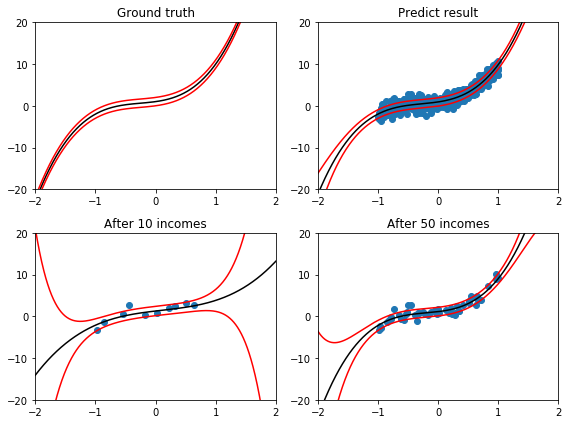

In [10]:
x, y, mean_list, variance_list = Predictive_distribution(n=4, a=1, w=[1,2,3,4], b=1, MAX_iteration=500)
draw(4, 1, [1,2,3,4], x, y, mean_list, variance_list, [10,50], MAX_iteration=500)

#### 2. b = 100, n = 4, a = 1, w = [1, 2, 3, 4] (The larger precision matrix, the lower the initial variance)

Add data point (-0.137070629024868, 3.130717723208166):

Posterior mean:
[0.03099133]
[-0.004248]
[0.00058228]
[-7.98129619e-05]

Posterior variance:
[ 9.90100887e-03  1.35687770e-05 -1.85988080e-06  2.54935031e-07]
[ 1.35687770e-05  9.99814012e-03  2.54935031e-07 -3.49441050e-08]
[-1.85988080e-06  2.54935031e-07  9.99996506e-03  4.78981045e-09]
[ 2.54935031e-07 -3.49441050e-08  4.78981045e-09  9.99999934e-03]

Predictive distribution ~ N(0.03158, 1.01009)
--------------------------------------------------
Add data point (0.8221263252862898, 9.205376335539935):

Posterior mean:
[0.11978936]
[0.06951964]
[0.06112381]
[0.04970734]

Posterior variance:
[ 9.80511359e-03 -6.60947955e-05 -6.72402437e-05 -5.35114930e-05]
[-6.60947955e-05  9.93196079e-03 -5.40588262e-05 -4.47006022e-05]
[-6.72402437e-05 -5.40588262e-05  9.95538943e-03 -3.66525787e-05]
[-5.35114930e-05 -4.47006022e-05 -3.66525787e-05  9.96985366e-03]

Predictive distribution ~ N(0.24588, 1.02376)
-------------------------------

Add data point (0.22199583518532107, 3.044168365969567):

Posterior mean:
[0.87047387]
[1.09579967]
[0.54148884]
[0.82805046]

Posterior variance:
[ 5.14010741e-03  9.53906278e-05 -1.42662945e-03  7.72815640e-06]
[ 9.53906278e-05  7.70961619e-03  6.37126516e-06 -1.44694914e-03]
[-1.42662945e-03  6.37126516e-06  8.59090864e-03 -5.90944537e-05]
[ 7.72815640e-06 -1.44694914e-03 -5.90944537e-05  8.79180403e-03]

Predictive distribution ~ N(1.14948, 1.00544)
--------------------------------------------------
Add data point (-0.6925005303515419, -2.0346833806148794):

Posterior mean:
[0.8612136]
[1.10584641]
[0.53577224]
[0.83214159]

Posterior variance:
[ 5.12104225e-03  1.16074980e-04 -1.43839887e-03  1.61510377e-05]
[ 1.16074980e-04  7.68717514e-03  1.91402487e-05 -1.45608737e-03]
[-1.43839887e-03  1.91402487e-05  8.58364308e-03 -5.38947920e-05]
[ 1.61510377e-05 -1.45608737e-03 -5.38947920e-05  8.78808285e-03]

Predictive distribution ~ N(0.076, 1.00953)
----------------------------------

Posterior mean:
[1.15224125]
[1.60643618]
[0.76093616]
[1.2044803]

Posterior variance:
[ 3.59075266e-03  1.20574944e-04 -1.70659794e-03  7.13176420e-06]
[ 1.20574944e-04  6.49137770e-03  2.16067054e-05 -2.08533122e-03]
[-1.70659794e-03  2.16067054e-05  7.81568373e-03 -1.64744122e-05]
[ 7.13176420e-06 -2.08533122e-03 -1.64744122e-05  8.18516974e-03]

Predictive distribution ~ N(0.97462, 1.0036)
--------------------------------------------------
Add data point (-0.39843130019816964, 0.6945662918457117):

Posterior mean:
[1.15269009]
[1.60611643]
[0.7608712]
[1.20452388]

Posterior variance:
[ 3.58009473e-03  1.28167532e-04 -1.70505548e-03  6.09681810e-06]
[ 1.28167532e-04  6.48596883e-03  2.05078695e-05 -2.08459394e-03]
[-1.70505548e-03  2.05078695e-05  7.81546050e-03 -1.63246298e-05]
[ 6.09681810e-06 -2.08459394e-03 -1.63246298e-05  8.18506924e-03]

Predictive distribution ~ N(0.55736, 1.00409)
--------------------------------------------------
Add data point (0.8241685098548615, 5.888

Add data point (0.3090171368701409, 1.0987395549253653):

Posterior mean:
[1.28950904]
[1.93334801]
[1.0194756]
[1.4758308]

Posterior variance:
[ 2.81353741e-03  1.08579863e-04 -1.79115054e-03 -1.61354990e-05]
[ 1.08579863e-04  5.66427242e-03 -2.37984763e-05 -2.48920204e-03]
[-1.79115054e-03 -2.37984763e-05  7.16759114e-03 -8.22125953e-05]
[-1.61354990e-05 -2.48920204e-03 -8.22125953e-05  7.76109759e-03]

Predictive distribution ~ N(2.02785, 1.0031)
--------------------------------------------------
Add data point (-0.4206323946669239, 0.4455387953137091):

Posterior mean:
[1.28926148]
[1.93355932]
[1.01952677]
[1.4757865]

Posterior variance:
[ 2.80754359e-03  1.13695686e-04 -1.78991164e-03 -1.72079443e-05]
[ 1.13695686e-04  5.65990599e-03 -2.48558912e-05 -2.48828670e-03]
[-1.78991164e-03 -2.48558912e-05  7.16733507e-03 -8.19909262e-05]
[-1.72079443e-05 -2.48828670e-03 -8.19909262e-05  7.76090570e-03]

Predictive distribution ~ N(0.5465, 1.0032)
--------------------------------------

Posterior mean:
[1.29513774]
[2.10270591]
[1.18818466]
[1.62040615]

Posterior variance:
[ 2.31699999e-03  6.44580451e-05 -1.71688435e-03 -2.17013672e-05]
[ 6.44580451e-05  5.18020022e-03 -4.63013277e-05 -2.64550590e-03]
[-1.71688435e-03 -4.63013277e-05  6.74975422e-03 -9.22970804e-05]
[-2.17013672e-05 -2.64550590e-03 -9.22970804e-05  7.53470795e-03]

Predictive distribution ~ N(1.1495, 1.00232)
--------------------------------------------------
Add data point (0.861362498940208, 8.326011526605912):

Posterior mean:
[1.29869398]
[2.11188953]
[1.19864927]
[1.62842587]

Posterior variance:
[ 2.31583184e-03  6.14414098e-05 -1.72032176e-03 -2.43356840e-05]
[ 6.14414098e-05  5.17241006e-03 -5.51781067e-05 -2.65230876e-03]
[-1.72032176e-03 -5.51781067e-05  6.73963926e-03 -1.00048845e-04]
[-2.43356840e-05 -2.65230876e-03 -1.00048845e-04  7.52876726e-03]

Predictive distribution ~ N(5.04783, 1.00737)
--------------------------------------------------
Add data point (-0.2133429726775009, -0.533

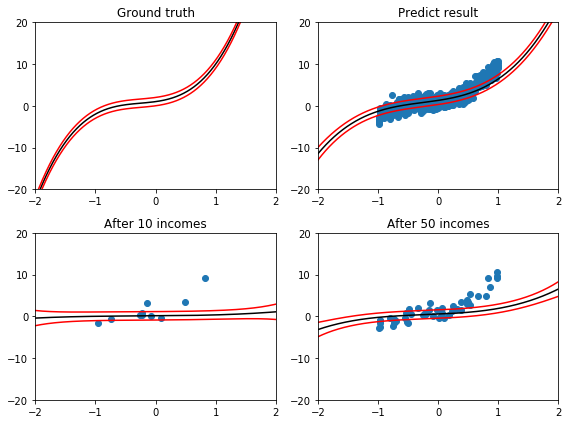

In [11]:
x, y, mean_list, variance_list = Predictive_distribution(n=4, a=1, w=[1,2,3,4], b=100, MAX_iteration=500)
draw(4, 1, [1,2,3,4], x, y, mean_list, variance_list, [10,50], MAX_iteration=500)

#### 3. b = 1, n = 3, a = 3, w = [1, 2, 3]

Add data point (0.18728518920165493, 1.4127470141357699):

Posterior mean:
[1.03147371]
[0.19317975]
[0.03617971]

Posterior variance:
[ 0.26988081 -0.13674051 -0.02560947]
[-0.13674051  0.97439053 -0.00479627]
[-0.02560947 -0.00479627  0.99910173]

Predictive distribution ~ N(1.06892, 0.58554)
--------------------------------------------------
Add data point (-0.9866249368741398, 2.395525133460398):

Posterior mean:
[1.243079]
[-0.42112369]
[0.56631734]

Posterior variance:
[ 0.21697863  0.01683784 -0.15814603]
[0.01683784 0.52854294 0.37996567]
[-0.15814603  0.37996567  0.66705608]

Predictive distribution ~ N(2.20984, 0.62593)
--------------------------------------------------
Add data point (0.5000317130498055, 2.7894221544044644):

Posterior mean:
[1.63970413]
[0.38155138]
[0.99021009]

Posterior variance:
[ 0.1713435  -0.07551682 -0.20691853]
[-0.07551682  0.34163904  0.28126171]
[-0.20691853  0.28126171  0.61493051]

Predictive distribution ~ N(2.07808, 0.51988)
----------------

Posterior mean:
[1.02940205]
[2.41738694]
[2.76840399]

Posterior variance:
[ 0.00537126 -0.00018104 -0.00813738]
[-0.00018104  0.00586241 -0.00057523]
[-0.00813738 -0.00057523  0.02128059]

Predictive distribution ~ N(6.07937, 0.34705)
--------------------------------------------------
Add data point (-0.043331284155734284, 0.9030682072190556):

Posterior mean:
[1.0289779]
[2.41742143]
[2.76904233]

Posterior variance:
[ 0.00528631 -0.00017413 -0.00800954]
[-0.00017413  0.00586185 -0.00058562]
[-0.00800954 -0.00058562  0.02108819]

Predictive distribution ~ N(0.92943, 0.33862)
--------------------------------------------------
Add data point (0.4071272128348731, 2.6202213204673006):

Posterior mean:
[1.03068462]
[2.41835004]
[2.76695601]

Posterior variance:
[ 0.0052415  -0.00019851 -0.00795476]
[-0.00019851  0.00584858 -0.00055582]
[-0.00795476 -0.00055582  0.02102122]

Predictive distribution ~ N(2.47389, 0.33725)
--------------------------------------------------
Add data point (-0

Posterior mean:
[1.12818822]
[2.30426213]
[2.41018638]

Posterior variance:
[ 2.71816110e-03 -6.45702308e-05 -4.24064752e-03]
[-6.45702308e-05  3.31049946e-03 -3.26991492e-04]
[-0.00424065 -0.00032699  0.01180542]

Predictive distribution ~ N(0.69657, 0.33667)
--------------------------------------------------
Add data point (-0.6863451481885006, -1.1989791635632736):

Posterior mean:
[1.12391328]
[2.31818381]
[2.40155107]

Posterior variance:
[ 2.71642287e-03 -5.89095447e-05 -4.24415872e-03]
[-5.89095447e-05  3.29206502e-03 -3.15557013e-04]
[-0.00424416 -0.00031556  0.01179833]

Predictive distribution ~ N(0.66414, 0.33651)
--------------------------------------------------
Add data point (0.7531546798217423, 4.066780772350242):

Posterior mean:
[1.12378328]
[2.31708253]
[2.40046494]

Posterior variance:
[ 2.71621485e-03 -6.06718473e-05 -4.24589677e-03]
[-6.06718473e-05  3.27713531e-03 -3.30281306e-04]
[-0.0042459  -0.00033028  0.01178381]

Predictive distribution ~ N(4.23055, 0.33651

[1.16979915]
[2.35649829]
[2.42992126]

Posterior variance:
[ 1.81213177e-03 -5.17116277e-05 -2.89581639e-03]
[-5.17116277e-05  2.30894970e-03 -3.10291890e-04]
[-0.00289582 -0.00031029  0.00833456]

Predictive distribution ~ N(1.15458, 0.33974)
--------------------------------------------------
Add data point (0.4008442677459456, 3.604710999816965):

Posterior mean:
[1.17415678]
[2.35920583]
[2.42439737]

Posterior variance:
[ 1.80687788e-03 -5.49760528e-05 -2.88915637e-03]
[-5.49760528e-05  2.30692140e-03 -3.06153788e-04]
[-0.00288916 -0.00030615  0.00832611]

Predictive distribution ~ N(2.50937, 0.33471)
--------------------------------------------------
Add data point (-0.28451395336176666, 2.6239906245045264):

Posterior mean:
[1.18328579]
[2.35497585]
[2.41216864]

Posterior variance:
[ 1.79934323e-03 -5.14848236e-05 -2.87906335e-03]
[-5.14848236e-05  2.30530372e-03 -3.10830453e-04]
[-0.00287906 -0.00031083  0.00831259]

Predictive distribution ~ N(0.70852, 0.33495)
--------------

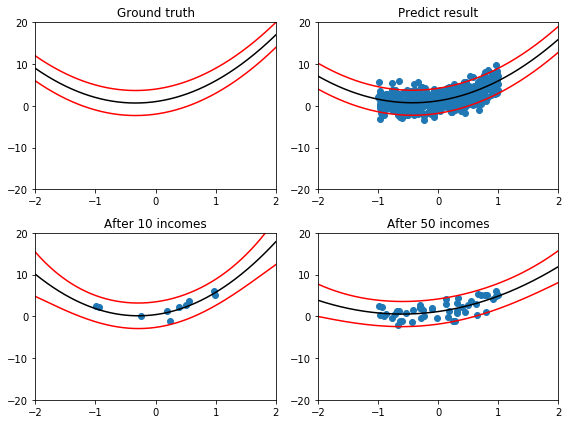

In [12]:
x, y, mean_list, variance_list = Predictive_distribution(n=3, a=3, w=[1,2,3], b=1, MAX_iteration=500)
draw(3, 3, [1,2,3], x, y, mean_list, variance_list, [10,50], MAX_iteration=500)